<a href="https://colab.research.google.com/github/Byeon-MJ/EveryOnes_AI_DL/blob/main/corona_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [ ]:
%rmdir /s /q deeplearning 
!git clone https://github.com/yhlee1627/deeplearning.git

Cloning into 'deeplearning'...


In [ ]:
import os

In [ ]:
path = os.getcwd()
print(path)

C:\Users\MJ\Desktop\My Study\모두의 인공지능 with Python\code


In [ ]:
dataframe = read_csv(path+'/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)

     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
print(dataset)

[[   24.]
 [   24.]
 [   27.]
 [   27.]
 [   28.]
 [   28.]
 [   28.]
 [   28.]
 [   28.]
 [   29.]
 [   30.]
 [   31.]
 [   51.]
 [  104.]
 [  204.]
 [  433.]
 [  602.]
 [  833.]
 [  977.]
 [ 1261.]
 [ 1766.]
 [ 2337.]
 [ 3150.]
 [ 3736.]
 [ 4212.]
 [ 4812.]
 [ 5328.]
 [ 5766.]
 [ 6284.]
 [ 6767.]
 [ 7134.]
 [ 7382.]
 [ 7513.]
 [ 7755.]
 [ 7869.]
 [ 7979.]
 [ 8086.]
 [ 8162.]
 [ 8236.]
 [ 8320.]
 [ 8413.]
 [ 8565.]
 [ 8652.]
 [ 8799.]
 [ 8897.]
 [ 8961.]
 [ 9037.]
 [ 9137.]
 [ 9241.]
 [ 9332.]
 [ 9478.]
 [ 9583.]
 [ 9661.]
 [ 9786.]
 [ 9887.]
 [ 9976.]
 [10062.]
 [10156.]
 [10237.]
 [10284.]
 [10331.]
 [10384.]
 [10423.]
 [10450.]
 [10480.]
 [10512.]
 [10537.]
 [10564.]
 [10591.]
 [10613.]
 [10635.]
 [10653.]
 [10661.]
 [10674.]
 [10683.]
 [10694.]
 [10702.]
 [10708.]
 [10718.]
 [10728.]
 [10738.]
 [10752.]
 [10761.]
 [10765.]
 [10774.]
 [10780.]
 [10793.]
 [10801.]
 [10804.]
 [10806.]
 [10810.]
 [10822.]
 [10840.]
 [10874.]
 [10909.]
 [10936.]
 [10962.]
 [10991.]
 [11018.]
 [11037.]


### 데이터 정규화 및 분류

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


### 데이터 형태 변형

In [ ]:
def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    for i in range(len(dataset) - look_back - 1):
        x_data.append(dataset[i:(i + look_back), 0])
        y_data.append(dataset[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [ ]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [ ]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


### 모델 생성

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape = (1, look_back)))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
85/85 [==============================] - 0s 468us/step - loss: 0.5174
Epoch 2/100
85/85 [==============================] - 0s 460us/step - loss: 0.1517
Epoch 3/100
85/85 [==============================] - 0s 452us/step - loss: 0.0582
Epoch 4/100
85/85 [==============================] - 0s 463us/step - loss: 0.0364
Epoch 5/100
85/85 [==============================] - 0s 465us/step - loss: 0.0277
Epoch 6/100
85/85 [==============================] - 0s 452us/step - loss: 0.0214
Epoch 7/100
85/85 [==============================] - 0s 452us/step - loss: 0.0163
Epoch 8/100
85/85 [==============================] - 0s 456us/step - loss: 0.0122
Epoch 9/100
85/85 [==============================] - 0s 466us/step - loss: 0.0089
Epoch 10/100
85/85 [==============================] - 0s 464us/step - loss: 0.0064
Epoch 11/100
85/85 [==============================] - 0s 477us/step - loss: 0.0046
Epoch 12/100
85/85 [==============================] - 0s 457us/step - loss: 0.0033
Epoch 13/100


85/85 [==============================] - 0s 455us/step - loss: 1.8286e-04
Epoch 97/100
85/85 [==============================] - 0s 449us/step - loss: 1.6338e-04
Epoch 98/100
85/85 [==============================] - 0s 452us/step - loss: 1.7156e-04
Epoch 99/100
85/85 [==============================] - 0s 440us/step - loss: 1.5988e-04
Epoch 100/100
85/85 [==============================] - 0s 452us/step - loss: 1.6710e-04


### 데이터 예측

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

In [ ]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score : %.2f RMSE' % (testScore))

Train Score : 132.44 RMSE
Test Score : 185.57 RMSE


### 결과 그래프 확인

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict) + look_back, :] = TrainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset), :] = TestPredict

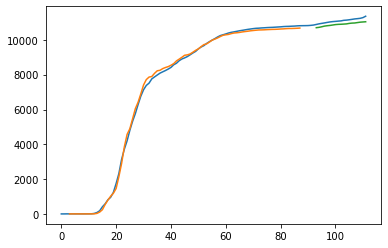

In [ ]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()